# Analysis of results with the simple configuration

## Setup
### Imports

In [177]:
# imports
import pandas as pd

In [178]:
results_path = 'results\\simple\\10000\\100_iter_results.csv'

Create the results table

In [179]:
# load the results csv file
results_df_raw = pd.read_csv(results_path)
display(results_df_raw.head())

,config_window_generator_type,config_window_size,config_population_comparer,config_threshold,config_max_distance,config_slide_by,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,all_lags,config_event_log_file_path,compute_time
0,fixed,100,HellingerDistanceComparer,0.5,200,5,4,5,4,1.000000,0.8,0.888889,29.500000,"[47, 47, 22, 2]",data\synthetic\attribute_drift\simple\10000\cf...,18.675517
1,fixed,100,HellingerDistanceComparer,0.5,200,10,3,5,3,1.000000,0.6,0.750000,25.333333,"[32, 32, 12]",data\synthetic\attribute_drift\simple\10000\cf...,9.964933
2,fixed,100,HellingerDistanceComparer,0.8,200,5,5,5,6,0.833333,1.0,0.909091,72.000000,"[82, 82, 77, 52, 67]",data\synthetic\attribute_drift\simple\10000\cf...,22.335607
3,fixed,100,HellingerDistanceComparer,0.8,200,10,5,5,5,1.000000,1.0,1.000000,56.000000,"[72, 72, 62, 42, 32]",data\synthetic\attribute_drift\simple\10000\cf...,9.515634
4,fixed,200,HellingerDistanceComparer,0.5,200,5,3,5,3,1.000000,0.6,0.750000,82.000000,"[102, 97, 47]",data\synthetic\attribute_drift\simple\10000\cf...,23.452252


In [180]:
# drop some columns that are not needed
drop_columns = ['config_event_log_file_path', 'all_lags']
results_df = results_df_raw.drop(columns=drop_columns)

# define the configuration columns to group results on 
config_columns = [column for column in results_df.columns if column.startswith('config_')]


results_df = results_df.groupby(by=config_columns).agg({
    'number_of_correct_detections': ['sum'],
    'number_of_true_changes': ['sum'],
    'number_of_detections': ['sum'],
    'precision': ['mean'],
    'recall': ['mean'],
    'f1_score': ['mean'],
    'mean_lag': ['mean'],
    'compute_time': ['mean']
})

results_df = results_df.reset_index()

# recalculate precision, recall and f1
results_df[('precision', 'true')] = results_df['number_of_correct_detections'] / results_df['number_of_detections']
results_df[('recall', 'true')] = results_df['number_of_correct_detections'] / results_df['number_of_true_changes']
results_df[('f1_score', 'true')] = 2 / (1/results_df[('precision', 'true')] + 1/results_df[('recall', 'true')])

results_df

,config_window_generator_type,config_window_size,config_population_comparer,config_threshold,config_max_distance,config_slide_by,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,compute_time,precision,recall,f1_score
,,,,,,,sum,sum,sum,mean,mean,mean,mean,mean,true,true,true
0,adaptive,100,ChiSquaredComparer,0.05,200,5,518,555,11201,0.047828,0.933333,0.090819,13.030030,12.001269,0.046246,0.933333,0.088125
1,adaptive,100,ChiSquaredComparer,0.05,200,10,512,555,6386,0.083302,0.922523,0.152268,1.337838,6.211597,0.080175,0.922523,0.147529
2,adaptive,100,HellingerDistanceComparer,0.05,200,5,0,500,0,NaN,0.000000,NaN,NaN,68.345241,NaN,0.000000,NaN
3,adaptive,100,HellingerDistanceComparer,0.05,200,10,0,500,0,NaN,0.000000,NaN,NaN,6.413497,NaN,0.000000,NaN
4,adaptive,100,HellingerDistanceComparer,0.50,200,5,150,340,151,0.991803,0.441176,0.625683,24.256831,17.478805,0.993377,0.441176,0.610998
5,adaptive,100,HellingerDistanceComparer,0.50,200,10,125,340,125,1.000000,0.367647,0.566250,16.327684,8.986149,1.000000,0.367647,0.537634
6,adaptive,100,HellingerDistanceComparer,0.80,200,5,340,340,405,0.862512,1.000000,0.920504,51.264706,17.781690,0.839506,1.000000,0.912752
7,adaptive,100,HellingerDistanceComparer,0.80,200,10,339,340,354,0.963235,0.997059,0.978313,37.985294,8.926458,0.957627,0.997059,0.976945
8,adaptive,100,KSTestPopComparer,0.05,200,5,543,555,808,0.709361,0.978378,0.810877,45.880631,2.182198,0.672030,0.978378,0.796772


In [181]:
# simplify by deleting non-interesting columns and getting rid of multiindex
drop_columns = [('precision', 'mean'), ('recall', 'mean'), ('f1_score', 'mean'), 
                ('number_of_correct_detections', 'sum'), ('number_of_true_changes', 'sum'), 
                ('number_of_detections', 'sum')]

simple_results_df = results_df.drop(columns=drop_columns)
simple_results_df.columns = simple_results_df.columns.get_level_values(0)

# reorder columns
ordered_columns = config_columns + ['precision', 'recall', 'f1_score', 'mean_lag', 'compute_time']

simple_results_df = simple_results_df[ordered_columns]

# set the configuration columns as index
simple_results_df = simple_results_df.set_index(config_columns)
simple_results_df

precision  \
config_window_generator_type config_window_size config_population_comparer config_threshold config_max_distance config_slide_by              
adaptive                     100                ChiSquaredComparer         0.05             200                 5                 0.046246   
                                                                                                                10                0.080175   
                                                HellingerDistanceComparer  0.05             200                 5                      NaN   
                                                                                                                10                     NaN   
                                                                           0.50             200                 5                 0.993377   
                                                                                                                10                1.000000   
                                                                           0.80             200                 5                 0.839506   
                                                                                                                10                0.957627   
                                                KSTestPopComparer          0.05             200                 5                 0.672030   
                                                                                                                10                0.869919   
                             200                ChiSquaredComparer         0.05             200                 5                 0.039310   
                                                                                                                10                0.061624   
                                                HellingerDistanceComparer  0.05             200                 5                      NaN   
                                                                                                                10                     NaN   
                                                                           0.50             200                 5                 0.993789   
                                                                                                                10                1.000000   
                                                                           0.80             200                 5                 0.985507   
                                                                                                                10                1.000000   
                                                KSTestPopComparer          0.05             200                 5                 0.608553   
                                                                                                                10                0.772981   
fixed                        100                ChiSquaredComparer         0.05             200                 5                 0.045719   
                                                                                                                10                0.077781   
                                                HellingerDistanceComparer  0.05             200                 5                      NaN   
                                                                                                                10                     NaN   
                                                                           0.50             200                 5                 1.000000   
                                                                                                                10                1.000000   
                                                                           0.80             200                 5                 0.856079   
           

## Analysis
### F1 Score

In [182]:
# get the statistics for the f1 score across all experiments
simple_results_df['f1_score'].describe()

count    38.000000
mean      0.674214
std       0.327066
min       0.073273
25%       0.568288
50%       0.794189
75%       0.934697
max       1.000000
Name: f1_score, dtype: float64

In [183]:
# look at the f1 score under the two different window types
for config_column in config_columns:
    display(simple_results_df.groupby([config_column]).agg({'f1_score':'mean'}))

,f1_score
config_window_generator_type,
adaptive,0.627532
fixed,0.708165


,f1_score
config_window_size,
100,0.704841
200,0.632102


,f1_score
config_population_comparer,
ChiSquaredComparer,0.105370
HellingerDistanceComparer,0.789041
KSTestPopComparer,0.868037


,f1_score
config_threshold,
0.05,0.590703
0.50,0.605502
0.80,0.972580


,f1_score
config_max_distance,
200,0.674214


,f1_score
config_slide_by,
5,0.611101
10,0.646386
15,0.944223
20,0.946392
25,0.945607
30,0.938776
35,0.909853
40,0.815490


In [184]:
# look at the f1 score under the two different window types
display(simple_results_df.groupby(['config_population_comparer', 'config_threshold', 'config_slide_by']).mean())

precision  \
config_population_comparer config_threshold config_slide_by              
ChiSquaredComparer         0.05             5                 0.042335   
                                            10                0.069712   
HellingerDistanceComparer  0.05             5                      NaN   
                                            10                     NaN   
                           0.50             5                 0.995303   
                                            10                1.000000   
                           0.80             5                 0.918118   
                                            10                0.979657   
KSTestPopComparer          0.05             5                 0.636482   
                                            10                0.813388   
                                            15                0.940476   
                                            20                0.976596   
                                            25                0.991228   
                                            30                1.000000   
                                            35                1.000000   
                                            40                1.000000   

                                                               recall  \
config_population_comparer config_threshold config_slide_by             
ChiSquaredComparer         0.05             5                0.958559   
                                            10               0.950901   
HellingerDistanceComparer  0.05             5                0.000000   
                                            10               0.000000   
                           0.50             5                0.464173   
                                            10               0.407246   
                           0.80             5                1.000000   
                                            10               0.999265   
KSTestPopComparer          0.05             5                0.990991   
                                            10               0.982432   
                                            15               0.948000   
                                            20               0.918000   
                                            25               0.904000   
                                            30               0.884615   
                                            35               0.834615   
                                            40               0.688462   

                                                             f1_score  \
config_population_comparer config_threshold config_slide_by             
ChiSquaredComparer         0.05             5                0.081051   
                                            10               0.129689   
HellingerDistanceComparer  0.05             5                     NaN   
                                            10                    NaN   
                           0.50             5                0.632936   
                                            10               0.578068   
                           0.80             5                0.955896   
                                            10               0.989265   
KSTestPopComparer          0.05             5                0.774519   
                                            10               0.888523   
                                            15               0.944223   
                                            20               0.946392   
                                            25               0.945607   
                                            30               0.938776   
                                            35               0.909853   
                                            40               0.815490   

                                                              mean_lag  \
config_population_compar

In [185]:
display(simple_results_df.groupby(['config_population_comparer', 'config_threshold', 'config_slide_by', 'config_window_generator_type']).mean())

precision  \
config_population_comparer config_threshold config_slide_by config_window_generator_type              
ChiSquaredComparer         0.05             5               adaptive                       0.042778   
                                                            fixed                          0.041892   
                                            10              adaptive                       0.070900   
                                                            fixed                          0.068524   
HellingerDistanceComparer  0.05             5               adaptive                            NaN   
                                                            fixed                               NaN   
                                            10              adaptive                            NaN   
                                                            fixed                               NaN   
                           0.50             5               adaptive                       0.993583   
                                                            fixed                          0.997024   
                                            10              adaptive                       1.000000   
                                                            fixed                          1.000000   
                           0.80             5               adaptive                       0.912507   
                                                            fixed                          0.923729   
                                            10              adaptive                       0.978814   
                                                            fixed                          0.980501   
KSTestPopComparer          0.05             5               adaptive                       0.640291   
                                                            fixed                          0.632672   
                                            10              adaptive                       0.821450   
                                                            fixed                          0.805326   
                                            15              fixed                          0.940476   
                                            20              fixed                          0.976596   
                                            25              fixed                          0.991228   
                                            30              fixed                          1.000000   
                                            35              fixed                          1.000000   
                                            40              fixed                          1.000000   

                                                                                            recall  \
config_population_comparer config_threshold config_slide_by config_window_generator_type             
ChiSquaredComparer         0.05             5               adaptive                      0.954955   
                                                            fixed                         0.962162   
                                            10              adaptive                      0.948649   
                                                            fixed                         0.953153   
HellingerDistanceComparer  0.05             5               adaptive                      0.000000   
                                                            fixed                         0.000000   
                                            10              adaptive                      0.000000   
                                                            fixed                         0.000000   
                           0.50             5               adaptive                      0.455882   
                                                            fixed                  

### Slide_by
The configuration "slide by" seems a promising way to reduce compute time and greatly increase precision

We more experiments with more sliding and the KSTestPopComparer

In [205]:
slide_by_df = simple_results_df.query('(config_population_comparer == "KSTestPopComparer") and (config_window_generator_type == "fixed") and (config_window_size == 100)')

# get the slide_by configuration into the index
slide_by_df = slide_by_df.reset_index()
slide_by_df.index = slide_by_df['config_slide_by']

# only get precision, recall, f1, mean_lag and compute time
slide_by_df = slide_by_df[list(set(slide_by_df.columns) - set(config_columns))]
slide_by_df

,mean_lag,compute_time,f1_score,precision,recall
config_slide_by,,,,,
5,48.626126,1.849567,0.791606,0.661427,0.985586
10,37.157658,0.969289,0.908475,0.857600,0.965766
15,25.654167,0.661160,0.944223,0.940476,0.948000
20,13.176667,0.518241,0.946392,0.976596,0.918000
25,2.950000,0.519792,0.945607,0.991228,0.904000
30,-8.407051,0.405831,0.938776,1.000000,0.884615
35,-19.206731,0.334071,0.909853,1.000000,0.834615
40,-23.487179,0.312931,0.815490,1.000000,0.688462


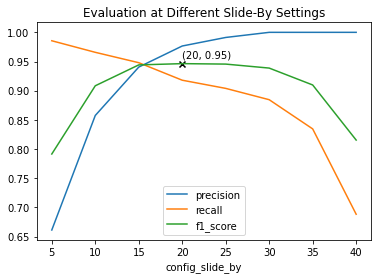

In [235]:
# show precision, recall and f1 in a plot
plt = slide_by_df[['precision', 'recall', 'f1_score']].plot(title='Evaluation at Different Slide-By Settings')

# add the maximum f1-score with a label
loc_max_f1 = slide_by_df['f1_score'].idxmax()
max_f1 = slide_by_df['f1_score'][loc_max_f1]

# add the label to the graph
plt.scatter(x=[loc_max_f1], y=[max_f1], marker='x', color='black')
plt.annotate(f'({loc_max_f1}, {max_f1:.2})', xy=(loc_max_f1, max_f1+0.01))

pass

<AxesSubplot:title={'center':'Runtime at Different Slide-By Settings'}, xlabel='config_slide_by'>

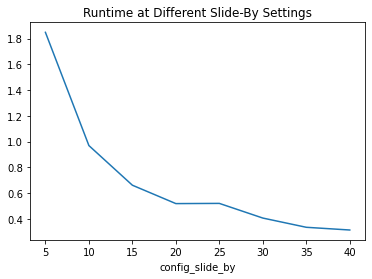

In [213]:
# analyse the run-time
slide_by_df['compute_time'].plot(title='Runtime at Different Slide-By Settings')

<AxesSubplot:title={'center':'Runtime at Different Slide-By Settings'}, xlabel='config_slide_by'>

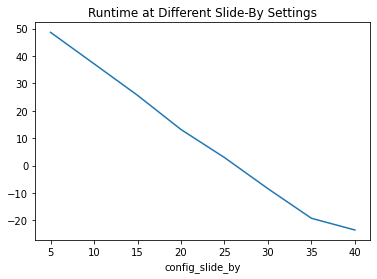

In [214]:
slide_by_df['mean_lag'].plot(title='Runtime at Different Slide-By Settings')

### Mean lag

In [186]:
simple_results_df['mean_lag'].describe()

count     38.000000
mean      47.801659
std       42.540772
min      -23.487179
25%       14.420631
50%       45.004523
75%       62.611878
max      131.675676
Name: mean_lag, dtype: float64

In [187]:
for config_column in config_columns:
    display(simple_results_df.groupby([config_column]).agg({'mean_lag':'mean'}))

,mean_lag
config_window_generator_type,
adaptive,54.657647
fixed,42.815485


,mean_lag
config_window_size,
100,20.830765
200,84.886638


,mean_lag
config_population_comparer,
ChiSquaredComparer,32.479073
HellingerDistanceComparer,57.544912
KSTestPopComparer,45.422275


,mean_lag
config_threshold,
0.05,40.715656
0.50,33.488880
0.80,81.600943


,mean_lag
config_max_distance,
200,47.801659


,mean_lag
config_slide_by,
5,62.784304
10,51.327143
15,25.654167
20,13.176667
25,2.950000
30,-8.407051
35,-19.206731
40,-23.487179


### Compute Time

In [188]:
simple_results_df['compute_time'].describe()

count    46.000000
mean     12.424923
std      14.294630
min       0.312931
25%       2.610554
50%       9.097954
75%      17.454594
max      70.083778
Name: compute_time, dtype: float64

In [189]:
for config_column in config_columns:
    display(simple_results_df.groupby([config_column]).agg({'compute_time':'mean'}))

,compute_time
config_window_generator_type,
adaptive,16.809191
fixed,9.052409


,compute_time
config_window_size,
100,9.619590
200,16.071856


,compute_time
config_population_comparer,
ChiSquaredComparer,11.162962
HellingerDistanceComparer,19.203522
KSTestPopComparer,1.525588


,compute_time
config_threshold,
0.05,10.520467
0.50,15.998224
0.80,15.993331


,compute_time
config_max_distance,
200,12.424923


,compute_time
config_slide_by,
5,20.706621
10,7.733101
15,0.661160
20,0.518241
25,0.519792
30,0.405831
35,0.334071
40,0.312931
